<a href="https://colab.research.google.com/github/IsaiasMartinezF/MachinLearning-/blob/main/predictor_parkinson_kernel_kpca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [4]:
#importemos los datos: 
# 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
# Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
# BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)
df = pd.read_csv('/content/drive/MyDrive/data_set_entrenamiento/Parkinsson disease.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


(195, 24)


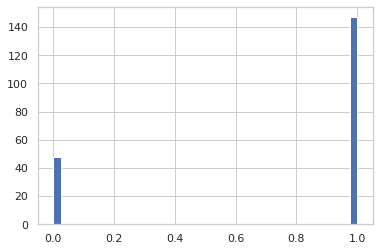

In [5]:
#Analizando datos
print(df.shape)
df.status.hist(bins = 40)

In [6]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#vamos a importar KernelPCA para su uso
#recordar que el kernel nos permite un aumento de dimensiones para un mejor analisis
from sklearn.decomposition import KernelPCA

In [7]:
#division d elos datos 
df_features = df.drop(['status'], axis =1)
#quitamos los strings
df_features = df.drop(['name'], axis =1)
df_target = df['status']
#normalizamos los datos 
df_features = StandardScaler().fit_transform(df_features)

In [8]:
#vamos a hacer la divisionde los datos
#test_size=0.3 nos dice el porcentaje en el que se va a dividir
#siempre se hace una particion de manera aleatoria 
#random_state=42 nos ayuda a que siempre tengamos la misma 
#distribucion siempre que se le ponga el mismo numero en este caso 42
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

In [9]:
#veamos que tinen la misma cantidad de datos 
print(X_train.shape)
print(y_train.shape)

(136, 23)
(136,)


In [10]:
#vamos a usar el kernelPCA
#la cantidad de divisiones esta vez sera 4
#seran los 4  componentes que mas info nos aportan
#necesita una entrada de la variable kernel, puede ser por ejemplo
#linear o poly
kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

In [13]:
logistic = LogisticRegression(solver='lbfgs')
#apliquemos el algoritmo pca
df_train = kpca.transform(X_train)
df_test = kpca.transform(X_test)
logistic.fit(df_train, y_train)
#veamos que tan exacto es 
print('Score Kpca:', logistic.score(df_test, y_test))

Score Kpca: 0.864406779661017
